In [1]:
import os
import zipfile

local_zip = 'train.csv.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf

train_data = pd.read_csv("train.csv")
#train_data.head()
train_feature = train_data.pop('question_text')
train_label = train_data.pop('target')
print(train_feature.shape)



(1306122,)


In [42]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='pre'
padding_type='pre'
oov_tok = "<OOV>"
training_size = 8000

In [43]:
text_train = train_feature[0:training_size]
text_test = train_feature[training_size:10000]
target_train = train_label[0:training_size]
target_test = train_label[training_size:10000]

In [44]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(text_train)

word_index = tokenizer.word_index

seq_train = tokenizer.texts_to_sequences(text_train)
seq_pad_train = pad_sequences(seq_train, maxlen=max_length, padding=padding_type, truncating=trunc_type)

seq_test = tokenizer.texts_to_sequences(text_test)
seq_pad_test = pad_sequences(seq_test, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [45]:
seq_pad_train = np.array(seq_pad_train)
seq_pad_test = np.array(seq_pad_test)
target_train = np.array(target_train)
target_test = np.array(target_test)

In [46]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [47]:
num_epochs = 5
history = model.fit(seq_pad_train, target_train, epochs=num_epochs, validation_data=(seq_pad_test, target_test), verbose=1, batch_size=1000)

Epoch 1/5
8/8 [==============================] - 7s 596ms/step - loss: 0.6673 - accuracy: 0.9334 - val_loss: 0.6323 - val_accuracy: 0.9365
Epoch 2/5
8/8 [==============================] - 4s 510ms/step - loss: 0.5793 - accuracy: 0.9362 - val_loss: 0.4691 - val_accuracy: 0.9365
Epoch 3/5
8/8 [==============================] - 4s 516ms/step - loss: 0.3368 - accuracy: 0.9362 - val_loss: 0.2356 - val_accuracy: 0.9365
Epoch 4/5
8/8 [==============================] - 4s 537ms/step - loss: 0.2438 - accuracy: 0.9362 - val_loss: 0.2497 - val_accuracy: 0.9365
Epoch 5/5
8/8 [==============================] - 5s 564ms/step - loss: 0.2443 - accuracy: 0.9362 - val_loss: 0.2369 - val_accuracy: 0.9365


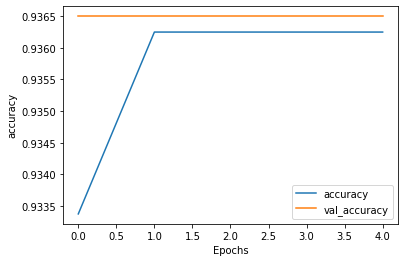

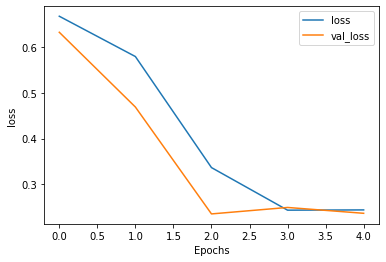

In [49]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")